# Week 3 - Project: Churn Prediction for  StreamWorks Media. 

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## 1. Loading & Exploring the Data 

In [370]:
file_name = 'streamworks_user_data.csv'
df = pd.read_csv(file_name)

In [371]:
df.head()

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
0,1001.0,56.0,Other,02-04-25,13-07-25,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99
1,1002.0,69.0,Male,02-01-23,13-07-25,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99
2,1003.0,46.0,Male,21-08-22,13-07-25,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99
3,1004.0,32.0,Other,14-09-23,13-07-25,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99
4,1005.0,60.0,Female,29-07-23,13-07-25,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99


In [372]:
df.tail()

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
1495,2496.0,40.0,Female,26-11-23,13-07-25,Canada,Standard,7.5,88.7,0.0,No,No,0.0,9.99
1496,2497.0,54.0,Male,12-02-25,13-07-25,USA,Basic,48.7,42.0,NaN,Yes,Yes,1.0,NaN
1497,2498.0,28.0,Other,01-03-23,13-07-25,UK,Premium,12.6,49.7,0.0,No,No,1.0,13.99
1498,2499.0,23.0,Female,24-10-22,13-07-25,USA,Basic,3.0,91.7,2.0,No,Yes,0.0,5.99
1499,2500.0,35.0,Other,26-01-23,13-07-25,Canada,Basic,77.7,77.6,2.0,No,Yes,0.0,5.99


In [373]:
df.shape

(1500, 14)

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 164.2+ KB


In [375]:
df.describe()

,user_id,age,average_watch_hours,mobile_app_usage_pct,complaints_raised,is_churned,monthly_fee
count,1498.000000,1497.000000,1496.000000,1498.000000,1497.000000,1499.000000,1355.000000
mean,1750.871829,43.738811,39.903342,51.414419,2.498330,0.234156,10.180406
std,433.060980,15.083920,22.978288,28.580117,1.706829,0.423612,3.310705
min,1001.000000,18.000000,0.500000,0.000000,0.000000,0.000000,5.990000
25%,1376.250000,31.000000,19.450000,27.100000,1.000000,0.000000,5.990000
50%,1750.500000,44.000000,40.300000,52.700000,2.000000,0.000000,9.990000
75%,2125.750000,56.000000,59.800000,76.200000,4.000000,0.000000,13.990000
max,2500.000000,69.000000,79.900000,100.000000,5.000000,1.000000,14.990000


In [376]:
df.value_counts()

user_id  age   gender  signup_date  last_active_date  country  subscription_type  average_watch_hours  mobile_app_usage_pct  complaints_raised  received_promotions  referred_by_friend  is_churned  monthly_fee
1001.0   56.0  Other   02-04-25     13-07-25          France   Standard           42.6                 77.4                  1.0                No                   No                  1.0         10.99          1
2014.0   42.0  Female  29-08-24     13-07-25          India    Premium            30.0                 83.3                  2.0                No                   Yes                 0.0         13.99          1
2012.0   43.0  Other   30-03-24     13-07-25          France   Premium            59.0                 50.4                  3.0                No                   No                  0.0         13.99          1
2011.0   39.0  Female  04-07-25     13-07-25          France   Standard           10.2                 94.0                  5.0                No   

In [377]:
df.isnull().sum()
# No to beginin filling ain all missing vaues and standerization of the data

user_id                   2
age                       3
gender                    1
signup_date               2
last_active_date          2
country                   3
subscription_type         3
average_watch_hours       4
mobile_app_usage_pct      2
complaints_raised         3
received_promotions       3
referred_by_friend        3
is_churned                1
monthly_fee             145
dtype: int64

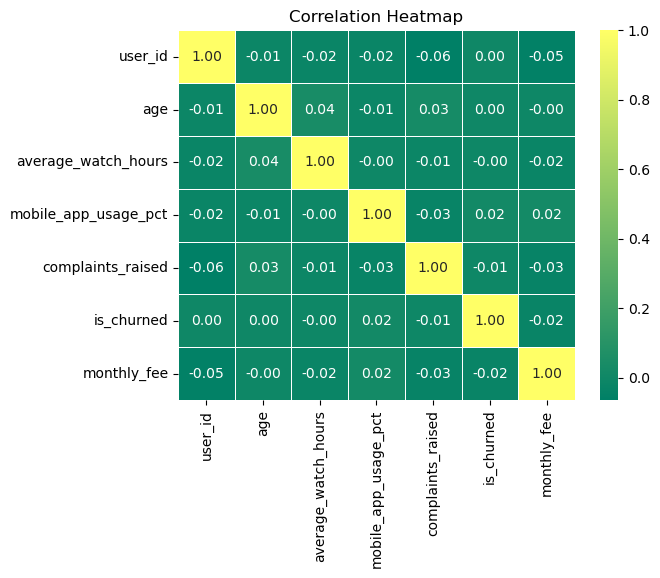

In [378]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap = 'summer', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Cleaning & Preparimng the Data

In [379]:
# starting with user_id missing values
df.loc[df['user_id'].isnull()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
56,NaN,45.0,Male,16-03-25,13-07-25,UK,Basic,8.7,60.6,5.0,No,No,1.0,5.99
886,NaN,35.0,Female,16-09-23,13-07-25,USA,Basic,6.0,54.8,1.0,No,Yes,0.0,6.99


In [380]:
df.loc[56, 'user_id'] = 1057.0
df.loc[886, 'user_id'] = 1887.0

In [381]:
df.user_id.duplicated().sum()

0

In [382]:
# Now age missing values
df.loc[df['age'].isnull()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
109,1110.0,NaN,Female,14-11-23,13-07-25,France,Standard,33.7,28.0,1.0,Yes,No,1.0,9.99
758,1759.0,NaN,Female,09-11-23,13-07-25,France,Premium,38.5,27.1,2.0,No,No,1.0,NaN
1130,2131.0,NaN,Female,18-04-24,13-07-25,France,Basic,69.8,99.2,4.0,NaN,No,1.0,5.99


In [383]:
df.age = df.age.fillna(df.age.median()) # this is the same as the mean value as a whole number

In [384]:
# checking unique values for 
df.age.unique()

array([56., 69., 46., 32., 60., 25., 38., 36., 40., 28., 41., 53., 57.,
       20., 39., 19., 61., 47., 55., 50., 29., 42., 66., 44., 59., 45.,
       33., 64., 68., 54., 24., 26., 35., 21., 31., 67., 43., 37., 52.,
       34., 23., 51., 27., 48., 65., 62., 58., 18., 22., 30., 49., 63.])

In [385]:
df.gender.unique()

array(['Other', 'Male', 'Female', nan], dtype=object)

In [386]:
df.gender.value_counts()

gender
Female    510
Other     506
Male      483
Name: count, dtype: int64

In [387]:
df.loc[df['gender'].isnull()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
1095,2096.0,29.0,NaN,27-08-22,NaN,France,Basic,25.0,63.1,5.0,No,Yes,1.0,5.99


In [388]:
# filing missing gender with other
df.gender = df.gender.fillna('Other')

In [389]:
df.signup_date.unique()

array(['02-04-25', '02-01-23', '21-08-22', '14-09-23', '29-07-23',
       '25-06-23', '15-02-23', '20-12-22', '30-05-25', '07-11-24',
       '26-11-22', '16-01-25', '29-04-24', '01-09-22', '29-08-22',
       '06-12-22', '18-06-23', '10-07-23', '06-09-24', '03-02-25',
       '24-08-22', '01-12-24', '18-05-23', '18-04-25', '07-07-25',
       '06-11-24', '25-04-24', '21-06-23', '10-06-24', '14-01-25',
       '19-09-23', '24-07-22', '19-03-23', '02-07-25', '30-04-24',
       '24-12-23', '18-09-23', '12-03-23', '13-06-23', '18-12-23',
       '19-12-22', '05-12-22', '24-02-24', '11-12-22', '22-01-24',
       '30-12-23', '05-02-25', '28-08-23', '19-09-22', '26-06-24',
       '24-10-24', '23-01-23', nan, '13-11-22', '17-11-24', '12-10-23',
       '16-03-25', '28-02-25', '26-01-24', '26-12-24', '08-05-23',
       '12-07-25', '30-10-22', '23-09-22', '06-05-25', '03-07-23',
       '06-10-23', '14-11-22', '17-12-22', '17-06-24', '27-03-25',
       '31-01-24', '23-03-23', '09-02-24', '16-01-24', '0

In [390]:
df.loc[df['signup_date'].isnull()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
52,1053.0,26.0,Male,NaN,13-07-25,Germany,Standard,6.7,49.1,1.0,Yes,Yes,0.0,10.99
644,1645.0,45.0,Other,NaN,13-07-25,Germany,Standard,50.7,0.7,0.0,Yes,No,1.0,10.99


In [391]:
df.signup_date.value_counts()

signup_date
30-05-24    6
28-10-24    6
19-09-23    6
26-01-23    6
29-08-23    6
           ..
16-12-23    1
01-03-25    1
23-03-25    1
21-09-24    1
12-02-25    1
Name: count, Length: 819, dtype: int64

In [392]:
df.loc[52, 'signup_date'] = '30-05-24'
df.loc[644, 'signup_date'] = '29-08-23'
pd.to_datetime(df['signup_date'], format='%d-%m-%y', errors='coerce')
df['signup_date'] = pd.to_datetime(df['signup_date'], format='%d-%m-%y', errors='coerce')

In [393]:
df.last_active_date.unique()

array(['13-07-25', nan], dtype=object)

In [394]:
df.last_active_date = df.last_active_date.fillna('13-07-25')

In [395]:
#Currently these dates are still a dtype object so they need to be converted
df.signup_date = pd.to_datetime(df.signup_date, format='%d-%m-%y')
df.last_active_date = pd.to_datetime(df.last_active_date, format='%d-%m-%y')

In [396]:
df.	country.unique() # space iun column title will need to be removed 

array(['France', 'India', 'UK', 'Germany', 'USA', 'Canada', nan],
      dtype=object)

In [397]:
df.	country.describe()

count       1497
unique         6
top       Canada
freq         262
Name: country, dtype: object

In [398]:
# Cannada will be usde to fill the other three valuse as it is aklready the to country with the most users
df. country = df. country.fillna('Canada')

In [399]:
print (df.subscription_type.unique())
print (df.subscription_type.value_counts())

['Standard' 'Basic' 'Premium' nan]
subscription_type
Basic       505
Premium     499
Standard    493
Name: count, dtype: int64


In [400]:
# Three NaN values in subscription type, deciding to fill valuse with each type of subsctription
df.loc[df['subscription_type'].isnull()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
110,1111.0,28.0,Female,2023-06-09,2025-07-13,France,NaN,37.2,68.7,4.0,Yes,Yes,0.0,9.99
145,1146.0,22.0,Other,2024-07-10,2025-07-13,Canada,NaN,78.6,86.7,0.0,No,No,0.0,13.99
1094,2095.0,66.0,Other,2023-01-18,2025-07-13,India,NaN,NaN,20.7,3.0,Yes,Yes,0.0,9.99


In [401]:
df.loc[110, 'subscription_type'] = 'Basic'
df.loc[145, 'subscription_type'] = 'Premium'
df.loc[1094, 'subscription_type'] = 'Standard'

In [402]:
df.average_watch_hours.describe()
df.average_watch_hours = df.average_watch_hours.fillna(40.3) # filling missing values with the median of the column

In [403]:
df.mobile_app_usage_pct.describe()
df.mobile_app_usage_pct = df.mobile_app_usage_pct.fillna(52.7) # filling missing values with the median of the column

In [404]:
df.complaints_raised.describe()
df.complaints_raised = df.complaints_raised.fillna(2.49)

In [405]:
print (df.received_promotions.unique())
print (df.received_promotions.value_counts()) 

['No' 'Yes' nan]
received_promotions
No     763
Yes    734
Name: count, dtype: int64


In [406]:
# Missing only three values and will not largely impact the count so all missing counts will go in favour of 'No'
df.received_promotions = df.received_promotions.fillna('No')

In [407]:
print (df.referred_by_friend.unique())
print (df.referred_by_friend.value_counts()) 
df.referred_by_friend = df.referred_by_friend.fillna('Yes')

['No' 'Yes' nan]
referred_by_friend
Yes    752
No     745
Name: count, dtype: int64


In [408]:
df.is_churned.value_counts()
df.is_churned = df.is_churned.fillna(0.0) # filling missing values with 'No' as it is the most common value in the column

In [409]:
print(df.monthly_fee.unique())
print(df.monthly_fee.describe())

[10.99  5.99 13.99  9.99 14.99   nan  6.99]
count    1355.000000
mean       10.180406
std         3.310705
min         5.990000
25%         5.990000
50%         9.990000
75%        13.990000
max        14.990000
Name: monthly_fee, dtype: float64


In [410]:
# 145 missng values for monthly fee, assumptions made that prices without discount are Basic :5.99 - 6.99, Standard: 9.99 - 10.99, Premium: 12.99 - 13.99
# Gong to use the average of those ranges to compensate for the uncertainty of discounts added or not
# Basic: 6.49, Standard: 10.49, Premium: 13.49
df.loc[(df['subscription_type'] == 'Basic') & (df['monthly_fee'].isna()), 'monthly_fee'] = 6.49
df.loc[(df['subscription_type'] == 'Standard') & (df['monthly_fee'].isna()), 'monthly_fee'] = 10.49
df.loc[(df['subscription_type'] == 'Premium') & (df['monthly_fee'].isna()), 'monthly_fee'] = 13.49



In [411]:
df.head(30)

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
0,1001.0,56.0,Other,2025-04-02,2025-07-13,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99
1,1002.0,69.0,Male,2023-01-02,2025-07-13,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99
2,1003.0,46.0,Male,2022-08-21,2025-07-13,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99
3,1004.0,32.0,Other,2023-09-14,2025-07-13,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99
4,1005.0,60.0,Female,2023-07-29,2025-07-13,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99
5,1006.0,25.0,Male,2023-06-25,2025-07-13,USA,Premium,40.0,24.7,1.0,No,Yes,0.0,13.99
6,1007.0,38.0,Male,2023-02-15,2025-07-13,UK,Premium,57.8,83.9,0.0,No,Yes,0.0,14.99
7,1008.0,56.0,Male,2022-12-20,2025-07-13,Germany,Premium,9.0,35.6,5.0,No,Yes,0.0,14.99
8,1009.0,36.0,Other,2025-05-30,2025-07-13,UK,Standard,11.6,82.7,1.0,No,Yes,0.0,10.49
9,1010.0,40.0,Male,2024-11-07,2025-07-13,France,Basic,21.5,70.9,5.0,Yes,Yes,0.0,6.99


In [412]:
df.isnull().sum()

user_id                 0
age                     0
gender                  0
signup_date             0
last_active_date        0
country                 0
subscription_type       0
average_watch_hours     0
mobile_app_usage_pct    0
complaints_raised       0
received_promotions     0
referred_by_friend      0
is_churned              0
monthly_fee             0
dtype: int64

In [413]:
df['tenure_days'] = (df['last_active_date'] - df['signup_date']).dt.days
df['is_loyal'] = df['tenure_days'].apply(lambda x: 'Yes' if x > 180 else 'No')

In [414]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender']) 
df['county_encoded'] = le.fit_transform(df['country']) 
df['subscription_type_encoded'] = le.fit_transform(df['subscription_type']) 
df['received_promotions_encoded'] = le.fit_transform(df['received_promotions']) 
df['referred_by_friend_encoded'] = le.fit_transform(df['referred_by_friend']) 
df['is_loyal_encoded'] = le.fit_transform(df['is_loyal']) 



In [415]:
df.head(20)

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,...,is_churned,monthly_fee,tenure_days,is_loyal,gender_encoded,county_encoded,subscription_type_encoded,received_promotions_encoded,referred_by_friend_encoded,is_loyal_encoded
0,1001.0,56.0,Other,2025-04-02,2025-07-13,France,Standard,42.6,77.4,1.0,...,1.0,10.99,102,No,2,1,2,0,0,0
1,1002.0,69.0,Male,2023-01-02,2025-07-13,India,Basic,65.3,98.0,4.0,...,1.0,5.99,923,Yes,1,3,0,0,1,1
2,1003.0,46.0,Male,2022-08-21,2025-07-13,UK,Premium,40.1,47.8,0.0,...,1.0,13.99,1057,Yes,1,4,1,0,1,1
3,1004.0,32.0,Other,2023-09-14,2025-07-13,Germany,Premium,5.8,53.2,1.0,...,1.0,13.99,668,Yes,2,2,1,1,1,1
4,1005.0,60.0,Female,2023-07-29,2025-07-13,India,Standard,32.7,16.8,5.0,...,0.0,9.99,715,Yes,0,3,2,0,1,1
5,1006.0,25.0,Male,2023-06-25,2025-07-13,USA,Premium,40.0,24.7,1.0,...,0.0,13.99,749,Yes,1,5,1,0,1,1
6,1007.0,38.0,Male,2023-02-15,2025-07-13,UK,Premium,57.8,83.9,0.0,...,0.0,14.99,879,Yes,1,4,1,0,1,1
7,1008.0,56.0,Male,2022-12-20,2025-07-13,Germany,Premium,9.0,35.6,5.0,...,0.0,14.99,936,Yes,1,2,1,0,1,1
8,1009.0,36.0,Other,2025-05-30,2025-07-13,UK,Standard,11.6,82.7,1.0,...,0.0,10.49,44,No,2,4,2,0,1,0
9,1010.0,40.0,Male,2024-11-07,2025-07-13,France,Basic,21.5,70.9,5.0,...,0.0,6.99,248,Yes,1,1,0,1,1,1


## 3. Statistical Analysis & Insights

### Chi-Square Test

In [416]:
from sklearn.feature_selection import chi2 
features = ['gender_encoded','received_promotions_encoded','referred_by_friend_encoded']
x = df[features]
y = df['is_churned']

In [417]:
chi_scores = chi2(x,y)
chi_scores

(array([2.02288342, 1.43828068, 0.43470952]),
 array([0.15494467, 0.23041777, 0.50968706]))

<Axes: >

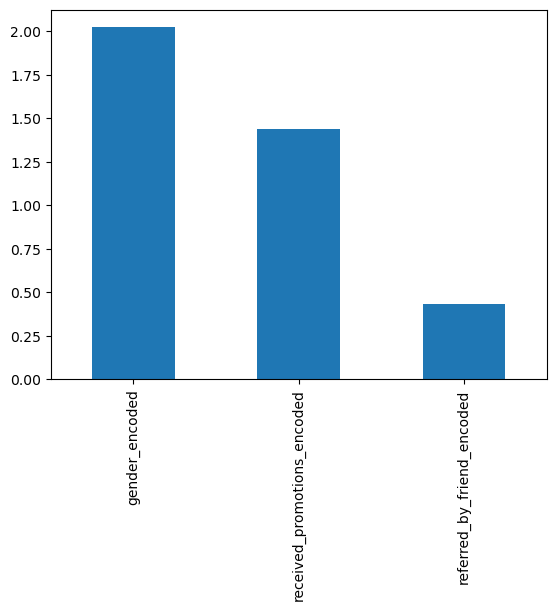

In [418]:
chi_values = pd.Series(chi_scores[0], index= x.columns)
chi_values.sort_values(ascending = False, inplace = True)
chi_values.plot.bar()

In [452]:
from sklearn.model_selection import train_test_split
x = df['average_watch_hours']
y = df['is_churned']


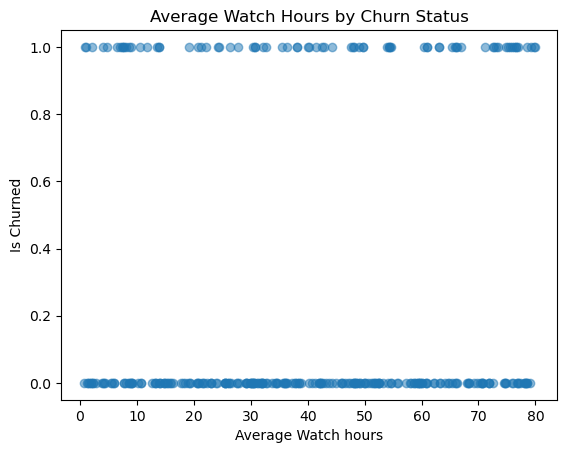

In [455]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
plt.scatter(x_test, y_test, alpha=0.5)
plt.title('Average Watch Hours by Churn Status')
plt.xlabel('Average Watch hours')
plt.ylabel('Is Churned')
plt.show()


In [421]:
from scipy.stats import ttest_ind

# Split the data into churned and non-churned groups
watch_time_churned = df[df['is_churned'] == 1]['average_watch_hours']
watch_time_not_churned = df[df['is_churned'] == 0]['average_watch_hours']

# Perform independent t-test
t_stat, p_value = ttest_ind(watch_time_churned, watch_time_not_churned, equal_var=False)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("There is a significant difference in watch time between churned and non-churned users.")
else:
    print("There is no significant difference in watch time between churned and non-churned users.")

T-statistic: -0.186, P-value: 0.8527
There is no significant difference in watch time between churned and non-churned users.


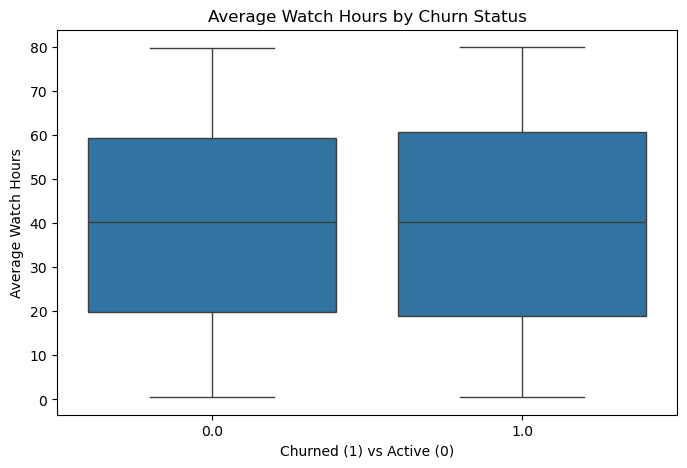

In [422]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_churned', y='average_watch_hours', data=df)
plt.title('Average Watch Hours by Churn Status')
plt.xlabel('Churned (1) vs Active (0)')
plt.ylabel('Average Watch Hours')
plt.show()


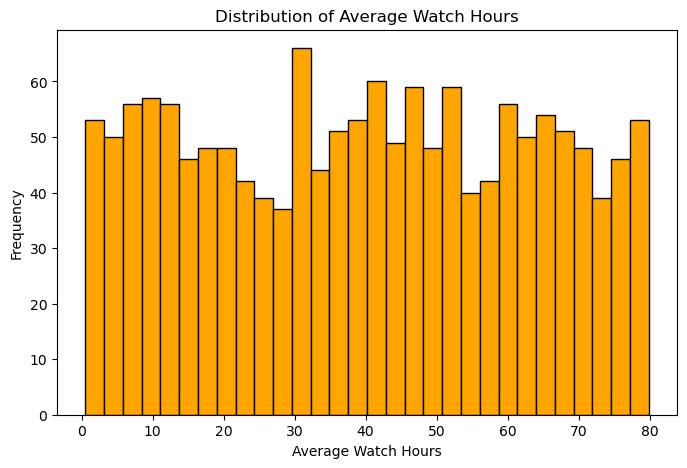

In [448]:
plt.figure(figsize=(8, 5))
plt.hist(df['average_watch_hours'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Average Watch Hours')
plt.xlabel('Average Watch Hours')
plt.ylabel('Frequency')
plt.show()

## 4. Predictive Modelling

In [423]:
df.head()

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,...,is_churned,monthly_fee,tenure_days,is_loyal,gender_encoded,county_encoded,subscription_type_encoded,received_promotions_encoded,referred_by_friend_encoded,is_loyal_encoded
0,1001.0,56.0,Other,2025-04-02,2025-07-13,France,Standard,42.6,77.4,1.0,...,1.0,10.99,102,No,2,1,2,0,0,0
1,1002.0,69.0,Male,2023-01-02,2025-07-13,India,Basic,65.3,98.0,4.0,...,1.0,5.99,923,Yes,1,3,0,0,1,1
2,1003.0,46.0,Male,2022-08-21,2025-07-13,UK,Premium,40.1,47.8,0.0,...,1.0,13.99,1057,Yes,1,4,1,0,1,1
3,1004.0,32.0,Other,2023-09-14,2025-07-13,Germany,Premium,5.8,53.2,1.0,...,1.0,13.99,668,Yes,2,2,1,1,1,1
4,1005.0,60.0,Female,2023-07-29,2025-07-13,India,Standard,32.7,16.8,5.0,...,0.0,9.99,715,Yes,0,3,2,0,1,1


In [424]:
target = df['is_churned']
features = ['age','average_watch_hours','mobile_app_usage_pct','complaints_raised', 'monthly_fee', 'tenure_days', 'gender_encoded',	'county_encoded', 'subscription_type_encoded', 'received_promotions_encoded', 'referred_by_friend_encoded', 'is_loyal_encoded']
t_features = df[features]


X_train, X_test, y_train, y_test = train_test_split(t_features, target, test_size=0.2, random_state=42)
# Training data is 80.0% of the total data.
# Test data makes up the remaining 20.0%.


In [425]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(t_features)

In [426]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_predictions = lr_model.predict(X_test)

In [427]:
# Predict probabilities for the test set using the logistic regression model
y_predictions_proba = log_model.predict_proba(X_test)[:, 1]

# Predict classes for the test set
y_pred = log_model.predict(X_test)

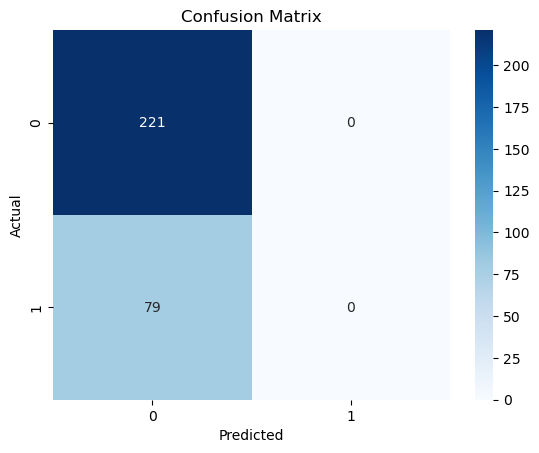

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='d',cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()                 

In [441]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.74
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


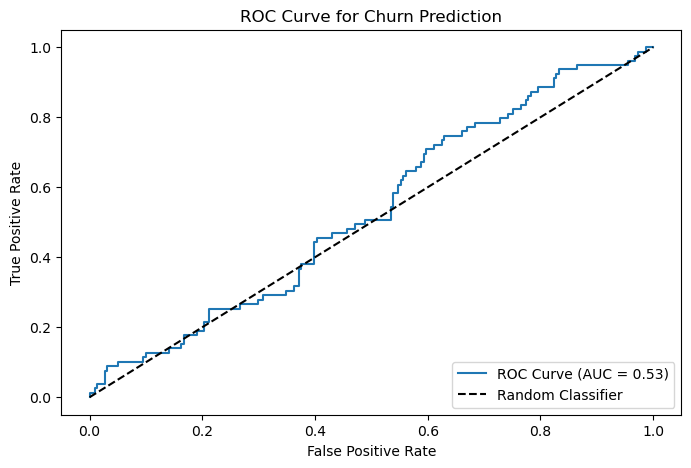

In [434]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_predictions_proba)
auc_score = roc_auc_score(y_test, y_predictions_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Churn Prediction')
plt.legend(loc='lower right')
plt.show()

In [436]:
# Get feature names and coefficients from the logistic regression model
coefficients = pd.Series(log_model.coef_[0], index=features)
# Sort by absolute value to get most important predictors
important_predictors = coefficients.abs().sort_values(ascending=False)
print("Most important predictors of churn (by absolute coefficient):")
print(important_predictors)

Most important predictors of churn (by absolute coefficient):
gender_encoded                 0.198760
received_promotions_encoded    0.151595
referred_by_friend_encoded     0.135285
subscription_type_encoded      0.124417
monthly_fee                    0.060516
is_loyal_encoded               0.049023
complaints_raised              0.020447
average_watch_hours            0.004656
age                            0.002317
county_encoded                 0.001226
mobile_app_usage_pct           0.000511
tenure_days                    0.000078
dtype: float64
